In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls /content/drive/MyDrive


Mounted at /content/drive
'[10.11] Fireweed Guidelines.gdoc'
' 1.1 - Made with Clipchamp_1674912748738.gif'
'5e8a2f159b1c2_Homework (1).pdf'
 5e8a2f159b1c2_Homework.gdoc
 5e8a2f159b1c2_Homework.pdf
'AC confirm 0628 .xlsx'
'BA360-Part 2 - Feature Extraction and Selection.pdf'
'bit221 mid ليقل.pdf'
'CAN YOU GENEREATE EXCLE FILE FOR THIS SELUTAION.gsheet'
'chapter 3 .gform'
'Colab Notebooks'
'Database 260 '
 DSC_1075.JPG
 generated_images
'give me the text from this photo.gsheet'
 hadoop.pptx
'hwawi mom'
 identifier
'in arabic explain '$'\n''(Parametric and Non-parametric).gsheet'
'Mhamed Huawei '
'output '
 Screenshot_20210220-014727.png
'SOLVE THIS IN EXCEL.gsheet'
'Test Bank for Quinn bit 221.docx.pdf'
'traffic data set '
'Untitled folder'
'Untitled form (1).gform'
'Untitled form.gform'
'· شركة الريادة المبتكرة.pptx'
'فقط اعد كتاتبه باللغه بالانجلبزبه ليتم تنسيقه فه وورد .gsheet'
'ما شاع ولم يثبت في السنه النبويه '


In [ ]:
import zipfile
import os
from PIL import Image
import numpy as np
#exteact zip file 1111
zip_file_path = "/content/drive/MyDrive/traffic data set /archive.zip"
extracted_path = "/content/trafficnet_dataset_v1"

if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("✅ Extraction successful!")
else:
    print("❌ File not found. Check the path!")

print("Dataset folders:", os.listdir(extracted_path))

def clean_corrupted_images(data_directory):
    corrupted_count = 0
    for category in os.listdir(data_directory):
        category_path = os.path.join(data_directory, category)
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                if os.path.isfile(file_path):
                    try:
                        with Image.open(file_path) as img:
                            img.verify()
                    except Exception as e:
                        print(f"⚠️ Corrupted file: {file_path} - {str(e)}")
                        corrupted_count += 1
    print(f"Found {corrupted_count} corrupted files.")

clean_corrupted_images(extracted_path)


✅ Extraction successful!
Dataset folders: ['train', 'test']
Found 0 corrupted files.


In [ ]:
train_dir = '/content/trafficnet_dataset_v1/train'
val_dir   = '/content/trafficnet_dataset_v1/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
# MobileNetV2
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  #

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
NUM_CLASSES = 4
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9067 - loss: 0.2631 - val_accuracy: 0.9075 - val_loss: 0.2420
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9155 - loss: 0.2532 - val_accuracy: 0.9025 - val_loss: 0.2495
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9239 - loss: 0.2314 - val_accuracy: 0.8963 - val_loss: 0.2545
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9246 - loss: 0.2088 - val_accuracy: 0.9100 - val_loss: 0.2431
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9270 - loss: 0.2071

113/113 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9270 - loss: 0.2072 - val_accuracy: 0.9187 - val_loss: 0.2369
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9278 - loss: 0.2034

113/113 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9278 - loss: 0.2035 - val_accuracy: 0.9250 - val_loss: 0.2217
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9136 - loss: 0.2285 - val_accuracy: 0.9125 - val_loss: 0.2533
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.9309 - loss: 0.1922 - val_accuracy: 0.9050 - val_loss: 0.2564
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9313 - loss: 0.2013 - val_accuracy: 0.9087 - val_loss: 0.2475
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9191 - loss: 0.1975 - val_accuracy: 0.9187 - val_loss: 0.2290
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9267 - loss: 0.1896 - val_accuracy: 0.9100 - val_loss: 0.2591


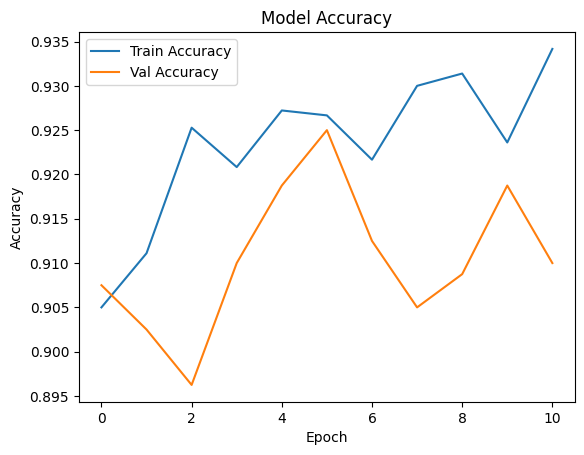

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-40]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.8680 - loss: 0.4260 - val_accuracy: 0.9112 - val_loss: 0.2311
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.8828 - loss: 0.3146 - val_accuracy: 0.9162 - val_loss: 0.2366
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.9146 - loss: 0.2472 - val_accuracy: 0.9150 - val_loss: 0.2444
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9128 - loss: 0.2609 - val_accuracy: 0.9175 - val_loss: 0.2428
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9236 - loss: 0.2003

113/113 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9236 - loss: 0.2005 - val_accuracy: 0.9312 - val_loss: 0.2108
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9289 - loss: 0.1967 - val_accuracy: 0.9312 - val_loss: 0.2082
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.9210 - loss: 0.2292 - val_accuracy: 0.9287 - val_loss: 0.2248
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9228 - loss: 0.2205 - val_accuracy: 0.9262 - val_loss: 0.2246
Epoch 9/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9359 - loss: 0.1665

113/113 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9359 - loss: 0.1667 - val_accuracy: 0.9337 - val_loss: 0.2111
Epoch 10/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9359 - loss: 0.1836

113/113 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9359 - loss: 0.1836 - val_accuracy: 0.9388 - val_loss: 0.2117


In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

labels = train_generator.classes  #

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}
